# 03. Archivos NetCDF con xarray
### Mini-curso de Introducción a la programación científica
#### Oceanografía Física, CICESE
22 de septiembre de 2025

## Archivos NetCDF y xarray
En este notebook aprenderemos qué son los archivos en formato netCDF con ayuda de la librería ``xarray`` y cómo manipular los datos. Esta breve introducción a netCDF y xarray es una versión traducida (y algo modificada) de los tres tutoriales de fundamentos de xarray de [Anderson Banihirwe](https://github.com/andersy005) que pueden encontrar aqui: https://github.com/xarray-contrib/xarray-tutorial/blob/master/online-tutorial-series. Hay un video (en inglés) en donde desarrollan este material: https://youtu.be/a339Q5F48UQ. Hay varios tutoriales de esta serie que les invito a explorar.

### Formato NetCDF
En Oceanografía y en Ciencias de la Tierra en general es muy común lidiar con estructuras de datos de muchas dimensiones (generalmente 3 espaciales + 1 temporal) como el estado del océano, la atmósfera, el interior de un planeta, etc. Es impráctico guardar estos datos en archivos de texto (como los .csv o .txt) porque necesitaríamos mucha capacidad de memoria para guardarlos, leerlos y procesarlos. Una de las mejores herramientas para manipular datos multidimensionales son los [netCDF](https://www.unidata.ucar.edu/software/netcdf/docs/faq.html#whatisit). Estos archivos almacenan datos en formato HDF (Hierarchical Data Format).

La estructura netCDF nos permite tener ``variables`` (los datos, por ejemplo, temperaturas de un modelo), ``dimensiones`` (variables especiales que nos ayudan a dar estructura a los datos, como tiempo, latitud, longitud, etc.) y ``atributos`` (información acerca de las variables).

En esta sección aprenderemos a leer y escribir datos netCDF pero antes de eso necesitamos instalar los paquetes `xarray` y `netcdf4` de python. Hay otras formas de leer y manipular archivos netCDF usando la biblioteca netcdf4, pero hoy aprenderemos como hacerlo usando `xarray`.

Ve a la terminal y escribe los siguientes comandos:

`conda install -c anaconda netcdf4 `

`conda install -c anaconda xarray `

> Nota: cambia por conda por mamba si instalaste minimamba

Cuando haya terminado la instalación continúa con la sección.

### ¿Qué es xarray?

Los arreglos N-dimensionales de números son las estructuras de datos más comúnes en el cómputo científico (Ej: arreglos de numpy), pero carecen de una forma útil de asociarles metadatos (la información adicional acerca de los datos las coordenadas, cuándo se crearon, quién los creó, etc). Asociar metadatos y datos usualmente depende del individuo o del paquete de software específico que se use. Aquí entra `xarray`.

`xarray` expande las capacidades de los arreglos de NumPy y nos brinda un montón de facilidades para manipular datos.

La manera de interactuar con `xarray` esta basada en el modelo de datos de los archivos netCDF (variables, atributos y dimensiones).

`xarray` tiene dos estructuras fundamentales de datos:
    
   * `DataArray`, el "arreglo de datos" que contiene una sola variable multidimensional y a sus coordenadas,
   * `Dataset`, el "conjunto de datos" que contiene multiples variables que potencialmente comparten las mismas coordenadas


![data structures](imagenes/xarray-data-structures.png)

Imagen de (https://github.com/xarray-contrib/xarray-tutorial/blob/master/online-tutorial-series/01_xarray_fundamentals.ipynb)


### ¿Cómo cargar datos NetCDF usando xarray?

In [1]:
# importar xarray como xr. El nombre corto "xr" es solo una convención.
import xarray as xr 

In [2]:
# Carga el conjunto de datos de temperatura superficial del mar
ds = xr.open_dataset("datos/sst.mnmean.nc", engine="netcdf4")

# representación HTML de xarray
ds

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 128, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 8MB ...
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

Explora el output (vista HTML) que te da xarray del conjunto de datos que cargamos en la variable `ds`. Por ejemplo, si das click en los íconos (hoja de papel y ¿discos?) al final de cada fila podrás ver información adicional de cada variable de datos y coordenada. ¿Qué variables contiene el conjunto de datos? ¿Cuáles son sus coordenadas? 

In [5]:
# También puedes ver una representación en modo texto. 
# Para eso solo descomenta la línea siguiente
#xr.set_options(display_style="text")

# Revisa la representación
#ds.info()

#### Dataset (conjunto de datos)

`Dataset` es un contenedor de arreglos etiquetados (`DataArrays`) con dimensiones alineadas, similar a un diccionario de Python. Está diseñado como una representación en memoria de un conjunto de datos NetCDF.

Además de darnos acceso a los datos, como un diccionario de Python, los `Datasets` tienen las siguentes propiedades:

|Atributo |Descripción |
|:--:|:--:|
|data_vars|`OrderedDict` de objetos `DataArray` correspondientes a variables de datos|
|dims| 	Mapeo de nombres de dimensiones a la longitud fija de cada dimensión (ej., {lat: 6, lon: 6, time: 8}).|
|coords| Un diccionario de arreglos (coordenadas) que etiquetan a cada punto (ej. arreglos 1D de números, objetos `datetime`|
|attrs |`OrderedDict` con metadatos arbitrarios del conjunto de datos.|


In [6]:
# Variables de datos en el conjunto de datos (dataset)
ds.data_vars

Data variables:
    sst      (time, lat, lon) float32 8MB ...

In [7]:
# selecciona la primera entrada a lo largo del primer eje (time) de la variable sst
ds.sst[0]

<xarray.DataArray 'sst' (lat: 89, lon: 180)> Size: 64kB
[16020 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
    time     datetime64[ns] 8B 2010-01-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

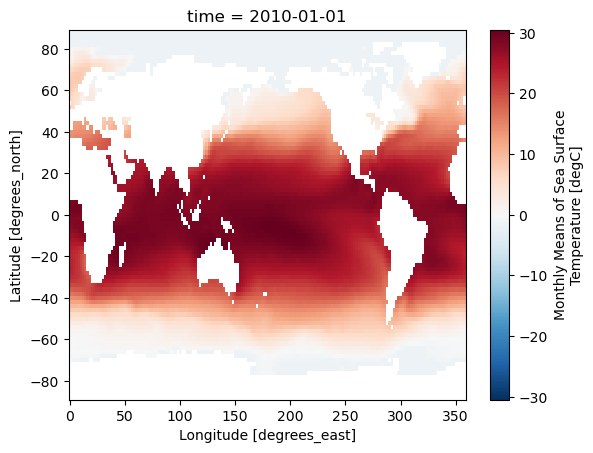

In [8]:
# Grafica un paso de tiempo
ds.sst[0].plot()

In [9]:
# dimensiones en el conjunto de datos
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 128, 'lat': 89, 'lon': 180})

In [10]:
# coordenadas en el conjunto de datos
ds.coords

Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01

In [11]:
# atributos globales del dataset
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': np.float32(-1.0),
 'geospatial_lon_max': np.float32(359.0),
 'geospatial_laty_max': np.float32(89.0),
 'geospatial_laty_min': np.float32(-89.0),
 'geospatial_lat_max': np.float32(89.0),
 'geospatial_lat_min': np.float32(-89.0),
 'geospatial_l

#### DataArray

El "arreglo de datos" `DataArray` es la implementación de un arreglo multidimensional con etiquetas. Algunas de sus propiedades clave son:

|Atributo| 	Descripción|
|:--:|::|
|data| 	arreglos numpy.ndarray o dask.array que contienen los datos.|
|dims| 	nombres de las dimensiones de cada eje. Ej:(x, y, z) (lat, lon, time).|
|coords| un contenedor estilo diccionario de arreglos (coordenadas) que etiquetan a cada punto(e.j., arreglos 1-D de números, objetos `datetime` o cadenas)|
|attrs| un `OrderedDict`que contiene metadatos y atributos (ej. unidades)|
|name |	nombre del arreglo|

In [12]:
# Extrae la variable o dataArray sst
ds["sst"]  # Equivalente a ds.sst

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
[2050560 values with dtype=float32]
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]

In [13]:
# El arreglo de datos (numpy) 
ds.sst.data

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

In [14]:
# dimesniones del data array/variable 
ds.sst.dims

('time', 'lat', 'lon')

In [15]:
# coordenadas del data array/variable 
ds.sst.coords

Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01

In [16]:
# atributos del dataarray/variable
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

#### Coordenadas vs. dimensiones
    
Los objetos `DataArray` dentro de un conjunto de datos `Dataset` pueden tener cualquier cantidad de dimensiones pero deben compartir el sistema de coordenadas.

Las coordenadas también pueden tener cualquier número de dimensiones, pero denotan cantidades constantes e independientes, a diferencia de las cantidades que pertenecen a los datos.

La dimensión es solo un nombre que le damos a un eje, como tiempo.

In [17]:
ds.dims

FrozenMappingWarningOnValuesAccess({'time': 128, 'lat': 89, 'lon': 180})

In [18]:
ds.coords

Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01

In [19]:
# extrae una variable de las coordenadas
ds.sst.lon

<xarray.DataArray 'lon' (lon: 180)> Size: 720B
array([  0.,   2.,   4.,   6.,   8.,  10.,  12.,  14.,  16.,  18.,  20.,  22.,
        24.,  26.,  28.,  30.,  32.,  34.,  36.,  38.,  40.,  42.,  44.,  46.,
        48.,  50.,  52.,  54.,  56.,  58.,  60.,  62.,  64.,  66.,  68.,  70.,
        72.,  74.,  76.,  78.,  80.,  82.,  84.,  86.,  88.,  90.,  92.,  94.,
        96.,  98., 100., 102., 104., 106., 108., 110., 112., 114., 116., 118.,
       120., 122., 124., 126., 128., 130., 132., 134., 136., 138., 140., 142.,
       144., 146., 148., 150., 152., 154., 156., 158., 160., 162., 164., 166.,
       168., 170., 172., 174., 176., 178., 180., 182., 184., 186., 188., 190.,
       192., 194., 196., 198., 200., 202., 204., 206., 208., 210., 212., 214.,
       216., 218., 220., 222., 224., 226., 228., 230., 232., 234., 236., 238.,
       240., 242., 244., 246., 248., 250., 252., 254., 256., 258., 260., 262.,
       264., 266., 268., 270., 272., 274., 276., 278., 280., 282., 284., 286.,
       288., 290., 292., 294., 296., 298., 300., 302., 304., 306., 308., 310.,
       312., 314., 316., 318., 320., 322., 324., 326., 328., 330., 332., 334.,
       336., 338., 340., 342., 344., 346., 348., 350., 352., 354., 356., 358.],
      dtype=float32)
Coordinates:
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
Attributes:
    units:               degrees_east
    long_name:           Longitude
    actual_range:        [  0. 358.]
    standard_name:       longitude
    axis:                X
    coordinate_defines:  center

In [20]:
# extrae una variable de las coordenadas de .coords
ds.coords["time"]

<xarray.DataArray 'time' (time: 128)> Size: 1kB
array(['2010-01-01T00:00:00.000000000', '2010-02-01T00:00:00.000000000',
       '2010-03-01T00:00:00.000000000', '2010-04-01T00:00:00.000000000',
       '2010-05-01T00:00:00.000000000', '2010-06-01T00:00:00.000000000',
       '2010-07-01T00:00:00.000000000', '2010-08-01T00:00:00.000000000',
       '2010-09-01T00:00:00.000000000', '2010-10-01T00:00:00.000000000',
       '2010-11-01T00:00:00.000000000', '2010-12-01T00:00:00.000000000',
       '2011-01-01T00:00:00.000000000', '2011-02-01T00:00:00.000000000',
       '2011-03-01T00:00:00.000000000', '2011-04-01T00:00:00.000000000',
       '2011-05-01T00:00:00.000000000', '2011-06-01T00:00:00.000000000',
       '2011-07-01T00:00:00.000000000', '2011-08-01T00:00:00.000000000',
       '2011-09-01T00:00:00.000000000', '2011-10-01T00:00:00.000000000',
       '2011-11-01T00:00:00.000000000', '2011-12-01T00:00:00.000000000',
       '2012-01-01T00:00:00.000000000', '2012-02-01T00:00:00.000000000',
       '2012-03-01T00:00:00.000000000', '2012-04-01T00:00:00.000000000',
       '2012-05-01T00:00:00.000000000', '2012-06-01T00:00:00.000000000',
       '2012-07-01T00:00:00.000000000', '2012-08-01T00:00:00.000000000',
       '2012-09-01T00:00:00.000000000', '2012-10-01T00:00:00.000000000',
       '2012-11-01T00:00:00.000000000', '2012-12-01T00:00:00.000000000',
       '2013-01-01T00:00:00.000000000', '2013-02-01T00:00:00.000000000',
       '2013-03-01T00:00:00.000000000', '2013-04-01T00:00:00.000000000',
       '2013-05-01T00:00:00.000000000', '2013-06-01T00:00:00.000000000',
       '2013-07-01T00:00:00.000000000', '2013-08-01T00:00:00.000000000',
       '2013-09-01T00:00:00.000000000', '2013-10-01T00:00:00.000000000',
       '2013-11-01T00:00:00.000000000', '2013-12-01T00:00:00.000000000',
       '2014-01-01T00:00:00.000000000', '2014-02-01T00:00:00.000000000',
       '2014-03-01T00:00:00.000000000', '2014-04-01T00:00:00.000000000',
       '2014-05-01T00:00:00.000000000', '2014-06-01T00:00:00.000000000',
       '2014-07-01T00:00:00.000000000', '2014-08-01T00:00:00.000000000',
       '2014-09-01T00:00:00.000000000', '2014-10-01T00:00:00.000000000',
       '2014-11-01T00:00:00.000000000', '2014-12-01T00:00:00.000000000',
       '2015-01-01T00:00:00.000000000', '2015-02-01T00:00:00.000000000',
       '2015-03-01T00:00:00.000000000', '2015-04-01T00:00:00.000000000',
       '2015-05-01T00:00:00.000000000', '2015-06-01T00:00:00.000000000',
       '2015-07-01T00:00:00.000000000', '2015-08-01T00:00:00.000000000',
       '2015-09-01T00:00:00.000000000', '2015-10-01T00:00:00.000000000',
       '2015-11-01T00:00:00.000000000', '2015-12-01T00:00:00.000000000',
       '2016-01-01T00:00:00.000000000', '2016-02-01T00:00:00.000000000',
       '2016-03-01T00:00:00.000000000', '2016-04-01T00:00:00.000000000',
       '2016-05-01T00:00:00.000000000', '2016-06-01T00:00:00.000000000',
       '2016-07-01T00:00:00.000000000', '2016-08-01T00:00:00.000000000',
       '2016-09-01T00:00:00.000000000', '2016-10-01T00:00:00.000000000',
       '2016-11-01T00:00:00.000000000', '2016-12-01T00:00:00.000000000',
       '2017-01-01T00:00:00.000000000', '2017-02-01T00:00:00.000000000',
       '2017-03-01T00:00:00.000000000', '2017-04-01T00:00:00.000000000',
       '2017-05-01T00:00:00.000000000', '2017-06-01T00:00:00.000000000',
       '2017-07-01T00:00:00.000000000', '2017-08-01T00:00:00.000000000',
       '2017-09-01T00:00:00.000000000', '2017-10-01T00:00:00.000000000',
       '2017-11-01T00:00:00.000000000', '2017-12-01T00:00:00.000000000',
       '2018-01-01T00:00:00.000000000', '2018-02-01T00:00:00.000000000',
       '2018-03-01T00:00:00.000000000', '2018-04-01T00:00:00.000000000',
       '2018-05-01T00:00:00.000000000', '2018-06-01T00:00:00.000000000',
       '2018-07-01T00:00:00.000000000', '2018-08-01T00:00:00.000000000',
       '2018-09-01T00:00:00.000000000', '2018-10-01T00:00:00.000000000',
       '2018-11-01T00:00:00.000000000', '2018-12-01T00:00:00.000000000',
       '20

#### Atributos

Se pueden usar para guardar metadatos. ¿Cuáles? Pues depende de tu dominio y tus necesidades.

In [21]:
# Ver atributos globales
ds.attrs

{'climatology': 'Climatology is based on 1971-2000 SST, Xue, Y., T. M. Smith, and R. W. Reynolds, 2003: Interdecadal changes of 30-yr SST normals during 1871.2000. Journal of Climate, 16, 1601-1612.',
 'description': 'In situ data: ICOADS2.5 before 2007 and NCEP in situ data from 2008 to present. Ice data: HadISST ice before 2010 and NCEP ice after 2010.',
 'keywords_vocabulary': 'NASA Global Change Master Directory (GCMD) Science Keywords',
 'keywords': 'Earth Science > Oceans > Ocean Temperature > Sea Surface Temperature >',
 'instrument': 'Conventional thermometers',
 'source_comment': 'SSTs were observed by conventional thermometers in Buckets (insulated or un-insulated canvas and wooded buckets) or Engine Room Intaker',
 'geospatial_lon_min': np.float32(-1.0),
 'geospatial_lon_max': np.float32(359.0),
 'geospatial_laty_max': np.float32(89.0),
 'geospatial_laty_min': np.float32(-89.0),
 'geospatial_lat_max': np.float32(89.0),
 'geospatial_lat_min': np.float32(-89.0),
 'geospatial_l

In [22]:
# Ver atributos específicos de una variable (sst)
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32)}

In [23]:
# Guardar algunos atributos arbitrarios en una variable de datos/dataArray
ds.sst.attrs["mi_atributo"] = "verde"
ds.sst.attrs

{'long_name': 'Monthly Means of Sea Surface Temperature',
 'units': 'degC',
 'var_desc': 'Sea Surface Temperature',
 'level_desc': 'Surface',
 'statistic': 'Mean',
 'dataset': 'NOAA Extended Reconstructed SST V5',
 'parent_stat': 'Individual Values',
 'actual_range': array([-1.8    , 42.32636], dtype=float32),
 'valid_range': array([-1.8, 45. ], dtype=float32),
 'mi_atributo': 'verde'}

## Índices y selección de datos

Este material proviene del tutorial [02_indexing.ipynb](https://github.com/xarray-contrib/xarray-tutorial/blob/master/online-tutorial-series/02_indexing.ipynb) de este [repositorio](https://github.com/xarray-contrib/xarray-tutorial). 

En esta sección aprenderemos a seleccionar datos de acuerdo a su posición (`.isel`), a sus coordenadas (`.sel`), series de tiempo por tiempo/fecha y a buscar el valor más cercano a otro usando `.sel`.

¿Por qué necesitamos índices basados en etiquetas (digamos coordendas)?

Hay etiquetas inherentes a los datos geofísicos. Por ejemplo, una sere de tiempo incluye "estampas de tiempo" o pasos de tiempo que etiquetan a cada punto de la serie; los datos en espacio tienen coordenadas o etiquetas que nos dicen en qué punto fue tomada cada medición (ej. lat, lon, elevación).

### Índices posicionales en NumPy 

Como vimos en el notebook anterior, cuando trabajamos con NumPy, indizamos de acuerdo a la posición (rebanadas/intervalos/enteros):

In [24]:
t = ds["sst"].data  # toma los datos, arreglo de numpy 
t

array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       ...,

       [[-1.8, -1.8, -1.

In [25]:
t.shape # revisemos el tamaño del arreglo

(128, 89, 180)

In [26]:
# extraemos una serie de tiempo para una sola ubicación espacial índices (10, 20)
t[:, 10, 20]

array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan],
      dtype=float32)

Pero, ¿qué etiquetas le corresponden a 10 y 20? ¿Era lat/lon o lon/lat? ¿Dónde están las estampas de tiempo que van con esta serie de tiempo?

### Indices en xarray

xarray ofrece rutinas flexibles que combinan lo mejor de NumPy y [pandas](https://pandas.pydata.org/) para seleccionar datos:

In [27]:
da = ds["sst"]  # Extrae arreglo de datos de la variable sst (DataArray)
da

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

* Los índices estilo NumPy aún funcionan en el Data Array, pero ahora se preservaron las etiquetas y metadatos:

In [28]:
da[:, 20, 40]

<xarray.DataArray 'sst' (time: 128)> Size: 512B
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=float32)
Coordinates:
    lat      float32 4B 48.0
    lon      float32 4B 80.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

Podemos seleccionar datos posicionalmente utilizando directamente el nombre de la dimensión: 

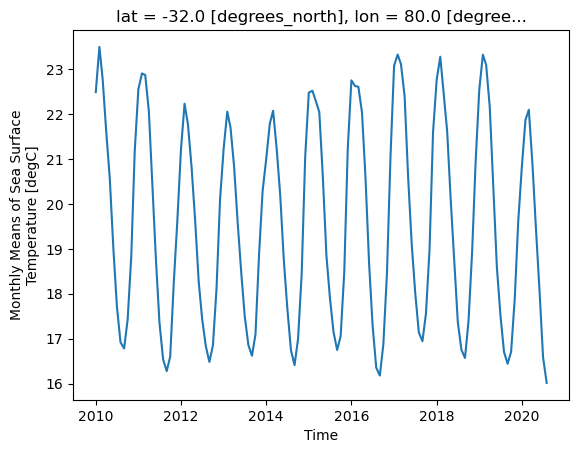

In [29]:
# selecciona todo en la posición 60 (índice 60) a lo largo de la dimensión lat y la 
# posición 40 a lo largo de la dimensión lon y grafica
da.isel(lat=60, lon=40).plot() 

Podemos usar las etiquetas para indizar:

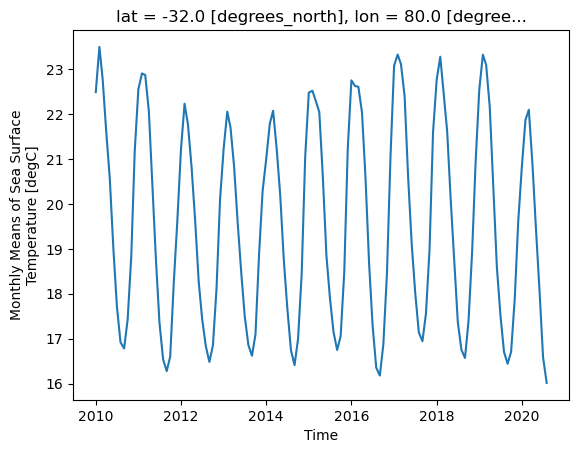

In [30]:
da.sel(lat=-32, lon=80).plot()

In [31]:
da.sel(lat=50.0, lon=200.0, time="2020")

<xarray.DataArray 'sst' (time: 8)> Size: 32B
array([ 5.501727,  5.015851,  4.808821,  5.837058,  7.285223,  8.64473 ,
       11.524967, 12.405846], dtype=float32)
Coordinates:
    lat      float32 4B 50.0
    lon      float32 4B 200.0
  * time     (time) datetime64[ns] 64B 2020-01-01 2020-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

In [32]:
# Ejemplo de "slicing" (tomar una rebanada de los datos)

ds.sel(time=slice("2019-05", "2020-07"))

<xarray.Dataset> Size: 962kB
Dimensions:  (time: 15, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 120B 2019-05-01 2019-06-01 ... 2020-07-01
Data variables:
    sst      (time, lat, lon) float32 961kB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

#### Encontrar el valor más cercano 

Podemos encontrar el dato más cercano a una posición (en tiepo o espacio) usando el método de vecinos más cercanos o "nearest neighbors":

In [33]:
da.sel(lat=52.25, lon=251.8998, method="nearest")

<xarray.DataArray 'sst' (time: 128)> Size: 512B
array([nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan, nan,
       nan, nan], dtype=float32)
Coordinates:
    lat      float32 4B 52.0
    lon      float32 4B 252.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

En el ejemplo buscamos el valor de sst más cecrano a lat=52.25 grados y lon=251.8998 grados y el resultado fue el valor en lat=52.0 y lon=252.0 

**Todos los métodos que hemos visto también funcionan en `Dataset`s:**

In [34]:
ds.sel(lat=52.25, lon=251.8998, method="nearest")

<xarray.Dataset> Size: 2kB
Dimensions:  (time: 128)
Coordinates:
    lat      float32 4B 52.0
    lon      float32 4B 252.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time) float32 512B nan nan nan nan nan nan ... nan nan nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

### Indices vectorizados

Como NumPy y Pandas, xarray nos permite indizar muchos elementos de una sola vez en forma vectorizada:

In [35]:
# genera coordenadas para un transecto de puntos
lat_points = xr.DataArray([60, 80, 90], dims="points")
lon_points = xr.DataArray([250, 250, 250], dims="points")
lat_points

<xarray.DataArray (points: 3)> Size: 24B
array([60, 80, 90])
Dimensions without coordinates: points

In [36]:
lon_points

<xarray.DataArray (points: 3)> Size: 24B
array([250, 250, 250])
Dimensions without coordinates: points

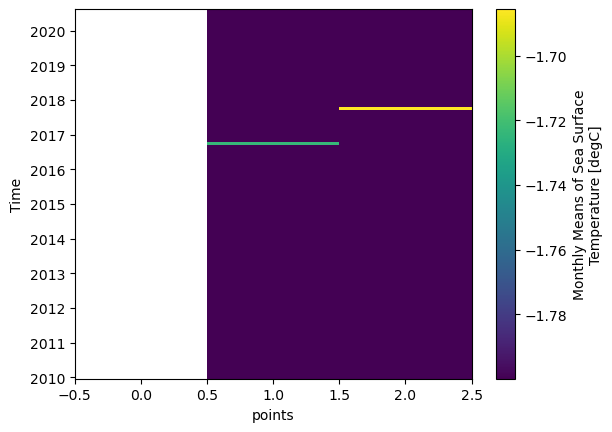

In [37]:
# selecciona los puntos más cercanos a lo largo del transecto
da.sel(lat=lat_points, lon=lon_points, method="nearest").plot()

#### Indizar con where()

Podemos elegir un subconjunto de datos que cumple alguna condición con .where() (donde la condición es cierta, haz algo).

In [38]:
# Reemplacemos los valores faltantes o NaN's (not a number) 
# con algún valor real arbitrario (-99)
ds.sst.where(ds.sst.notnull(), -99)

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
...
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]],

       [[ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        [ -1.8,  -1.8,  -1.8, ...,  -1.8,  -1.8,  -1.8],
        ...,
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ],
        [-99. , -99. , -99. , ..., -99. , -99. , -99. ]]],
      shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

Ya no hay NaN's 

## Computar con los datos

Finalmente veremos cómo hacer aritmética básica con los datos y cómo agregar o reducir a lo largo de una dimensión.

Las operaciones aritméticas con un solo arreglo de datos (DataArray) se vectorizan automáticamente, como en NumPy:

In [39]:
da = ds["sst"]
da

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       ...,

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]],

       [[-1.8, -1.8, ..., -1.8, -1.8],
        [-1.8, -1.8, ..., -1.8, -1.8],
        ...,
        [ nan,  nan, ...,  nan,  nan],
        [ nan,  nan, ...,  nan,  nan]]], shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

In [40]:
da + 273.15 # también es un vector

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
...
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]],

       [[271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        [271.35, 271.35, 271.35, ..., 271.35, 271.35, 271.35],
        ...,
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan],
        [   nan,    nan,    nan, ...,    nan,    nan,    nan]]],
      shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01

#### Métodos de agregación y reducción

Xarray soporta muchos de los métodos de agregación de NumPy (Ej: all, any, argmax, argmin, max, mean, median, min, prod, sum, std, var). A diferencia de NumPy, podemos usar los nombres de las dimensiones en vez de el escalar del eje:

In [41]:
da_mean = da.mean(dim="time")
da_mean

<xarray.DataArray 'sst' (lat: 89, lon: 180)> Size: 64kB
array([[-1.7965822, -1.7966435, -1.7966874, ..., -1.7976037, -1.796984 ,
        -1.7965525],
       [-1.7968166, -1.7963768, -1.796082 , ..., -1.7992076, -1.7980535,
        -1.7973973],
       [-1.7999136, -1.798993 , -1.7984267, ..., -1.7992468, -1.7995085,
        -1.7997851],
       ...,
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan],
       [       nan,        nan,        nan, ...,        nan,        nan,
               nan]], shape=(89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0

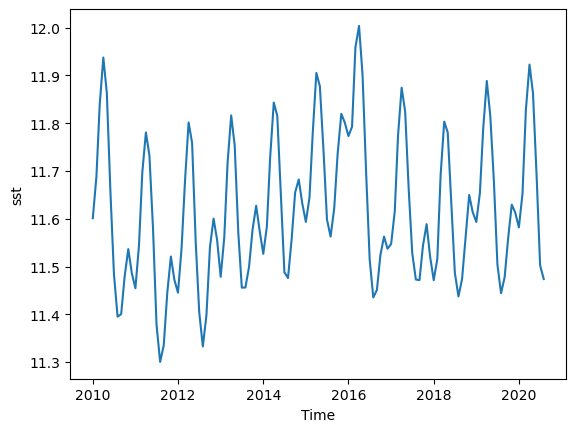

In [42]:
da.std(dim=["lat", "lon"]).plot()

#### Broadcasting:

Broadcasting permite que un operador o función actúe en uno o más arreglos aún cuando no tienen la misma forma (shape) bajo ciertas condiciones. El siguiente esquema de Stephan Hoyer -- [xarray ECMWF Python workshop](https://docs.google.com/presentation/d/16CMY3g_OYr6fQplUZIDqVtG-SKZqsG8Ckwoj2oOqepU/edit#slide=id.g2b68f9254d_1_154) --  ilustra el resultado de operar en arreglos con distintas coordenadas:

![broadcasting](imagenes/broadcasting.png)

In [43]:
#Veamos los tamaños y coordenadas de del dataArray da
da.shape, da.dims

((128, 89, 180), ('time', 'lat', 'lon'))

In [44]:
# Veamos el tamaÑo y coordenadas después de tomar el promedio (dataArray da_mean)
da_mean.shape, da_mean.dims

((89, 180), ('lat', 'lon'))

In [46]:
# Restemos el promedio (2D) al arreglo original (3D)
x = da - da_mean
x

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
...
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]],

       [[-3.4177303e-03, -3.3564568e-03, -3.3125877e-03, ...,
         -2.3962259e-03, -3.0159950e-03, -3.4474134e-03],
        [-3.1833649e-03, -3.6231279e-03, -3.9179325e-03, ...,
         -7.9238415e-04, -1.9464493e-03, -2.6026964e-03],
        [-8.6307526e-05, -1.0069609e-03, -1.5732050e-03, ...,
         -7.5316429e-04, -4.9149990e-04, -2.1481514e-04],
        ...,
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan],
        [           nan,            nan,            nan, ...,
                    nan,            nan,            nan]]],
      shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01

Nos quedó algo de 3 dimensiones

### Operaciones de alto nivel: groupby, resample, rolling, coarsen, weighted

Xarray tiene otras funciones muy útiles de alto nivel que te permiten hacer operciones comunes:
   * `groupby` : Agrupa los datos en casillas o "bins" y reduce el tamaño
   * `resample` : Caso especial de `groupby`para el eje temporal. Permite cambiar la frecuencia de muestreo de los datos (upsample o downsample).
   * `rolling` : Opera en ventanas móviles. Ej. media móvil
   * `coarsen` : Disminuye la frecuencia de muestreo (Downsample)
   * `weighted` : Pondera los datos antes de aplicar alguna reducción.

#### groupby

In [47]:
ds

<xarray.Dataset> Size: 8MB
Dimensions:  (time: 128, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Data variables:
    sst      (time, lat, lon) float32 8MB -1.8 -1.8 -1.8 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [48]:
# Agrupa por estación del año
ds.groupby("time.season")

<DatasetGroupBy, grouped over 1 grouper(s), 4 groups in total:
    'season': UniqueGrouper('season'), 4/4 groups with labels 'DJF', 'JJA', 'MAM', 'SON'>

In [49]:
# agrupa por día de la semana
ds.groupby("time.dayofweek")

<DatasetGroupBy, grouped over 1 grouper(s), 7 groups in total:
    'dayofweek': UniqueGrouper('dayofweek'), 7/7 groups with labels 0, 1, 2, 3, 4, 5, 6>

In [50]:
# calcula el promedio estacional
seasonal_mean = ds.groupby("time.season").mean()
seasonal_mean

<xarray.Dataset> Size: 257kB
Dimensions:  (season: 4, lat: 89, lon: 180)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * season   (season) object 32B 'DJF' 'JJA' 'MAM' 'SON'
Data variables:
    sst      (season, lat, lon) float32 256kB -1.799 -1.799 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

In [51]:
# Las estaciones no están en orden pero podemos acomodarlas en orden usando .reindex
seasonal_mean = seasonal_mean.reindex(season=["DJF", "MAM", "JJA", "SON"])
seasonal_mean

<xarray.Dataset> Size: 257kB
Dimensions:  (lat: 89, lon: 180, season: 4)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * season   (season) <U3 48B 'DJF' 'MAM' 'JJA' 'SON'
Data variables:
    sst      (season, lat, lon) float32 256kB -1.799 -1.799 -1.8 ... nan nan nan
Attributes: (12/37)
    climatology:               Climatology is based on 1971-2000 SST, Xue, Y....
    description:               In situ data: ICOADS2.5 before 2007 and NCEP i...
    keywords_vocabulary:       NASA Global Change Master Directory (GCMD) Sci...
    keywords:                  Earth Science > Oceans > Ocean Temperature > S...
    instrument:                Conventional thermometers
    source_comment:            SSTs were observed by conventional thermometer...
    ...                        ...
    creator_url_original:      https://www.ncei.noaa.gov
    license:                   No constraints on data access or use
    comment:                   SSTs were observed by conventional thermometer...
    summary:                   ERSST.v5 is developed based on v4 after revisi...
    dataset_title:             NOAA Extended Reconstructed SST V5
    data_modified:             2020-09-07

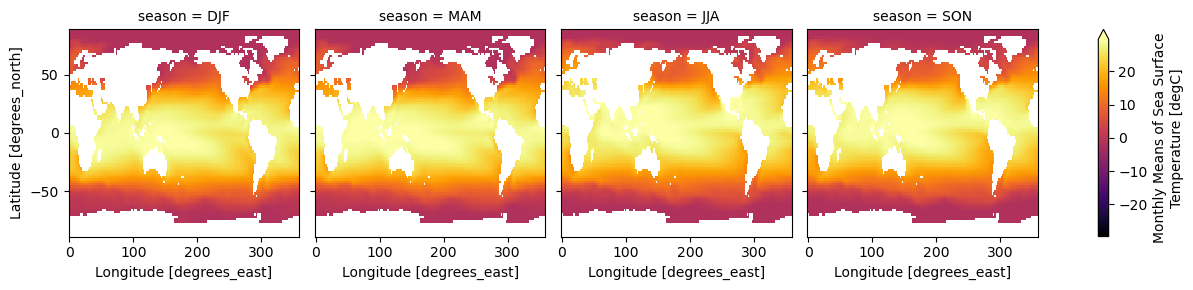

In [52]:
seasonal_mean.sst.plot(col="season", robust=True, cmap="inferno")

#### resample

In [53]:
# Cambia la frecuencia de muestreo a cada 4 meses
ds.sst.resample(time="2MS").mean()

<xarray.DataArray 'sst' (time: 64, lat: 89, lon: 180)> Size: 4MB
array([[[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
...
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]],

       [[-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        [-1.8, -1.8, -1.8, ..., -1.8, -1.8, -1.8],
        ...,
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan],
        [ nan,  nan,  nan, ...,  nan,  nan,  nan]]],
      shape=(64, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 512B 2010-01-01 2010-03-01 ... 2020-07-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

#### rolling window operations

In [54]:
# Média móvil con ventana tamaño 7
ds.sst.rolling(time=7).mean()

<xarray.DataArray 'sst' (time: 128, lat: 89, lon: 180)> Size: 8MB
array([[[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
...
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]],

       [[-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        [-1.8000001, -1.8000001, -1.8000001, ..., -1.8000001,
         -1.8000001, -1.8000001],
        ...,
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan],
        [       nan,        nan,        nan, ...,        nan,
                nan,        nan]]], shape=(128, 89, 180), dtype=float32)
Coordinates:
  * lat      (lat) float32 356B 88.0 86.0 84.0 82.0 ... -82.0 -84.0 -86.0 -88.0
  * lon      (lon) float32 720B 0.0 2.0 4.0 6.0 8.0 ... 352.0 354.0 356.0 358.0
  * time     (time) datetime64[ns] 1kB 2010-01-01 2010-02-01 ... 2020-08-01
Attributes:
    long_name:     Monthly Means of Sea Surface Temperature
    units:         degC
    var_desc:      Sea Surface Temperature
    level_desc:    Surface
    statistic:     Mean
    dataset:       NOAA Extended Reconstructed SST V5
    parent_stat:   Individual Values
    actual_range:  [-1.8     42.32636]
    valid_range:   [-1.8 45. ]
    mi_atributo:   verde

### Pon en práctica lo que aprendiste

1. Grafica una serie de tiempo de la máxima temperatura superficial del mar mensual entre 2010 y 2020.

2. Grafica el promedio de la tempertura superficial del mar en enero (promedio de los eneros desde 2010 hasta 2020).

3. Calcula y grafica las anomalías mensuales de SST en 2013, considerando el periodo de 2010 a 2020 (calcula el promedio mensual de 2010 a 2020 y restalo a cada promedio mensual, pero solo grafica las anomalías para 2013).

In [55]:
# Solución ejercicio 1


In [56]:
# Solución ejercicio 2


In [57]:
# Solución ejercicio 3


### Más recursos

Esto solo es una introducción a xarray y netcdf. Si quieren ir más allá les recomiendo estos notebooks y la documentación de xarray:
    
**Docs:**
* Estructuras de datos: http://xarray.pydata.org/en/latest/data-structures.html
* Lectura y escritura de archivos: https://xarray.pydata.org/en/stable/io.html
* Índices y selección de datos: https://xarray.pydata.org/en/stable/user-guide/indexing.html 

**Enlaces a notebooks**

Tutoriales de xarray:

* [Cómputo con xarray (extendida)](https://github.com/xarray-contrib/xarray-tutorial/blob/c133a80c2d911ef841ee6197f88ec0a0d87fbd94/scipy-tutorial/03_computation_with_xarray.ipynb)
* [Gráficas y visualización](https://github.com/xarray-contrib/xarray-tutorial/blob/c133a80c2d911ef841ee6197f88ec0a0d87fbd94/scipy-tutorial/04_plotting_and_visualization.ipynb)
